# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [4]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

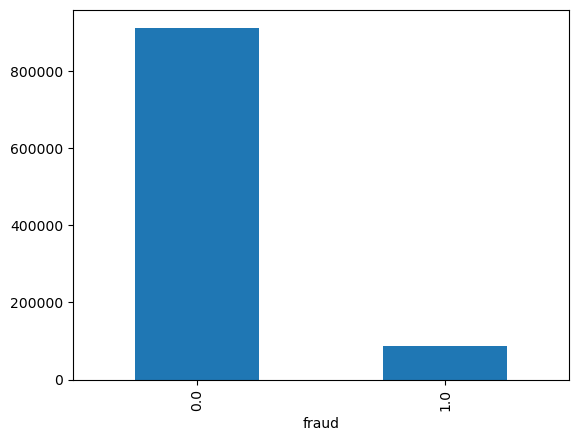

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [8]:
#1
f_df = fraud["fraud"].value_counts()
f_df.plot(kind="bar")
plt.show()
f_df
#The distribution is highly imbalanced

In [13]:
#2 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = fraud.drop(columns = "fraud")
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg.score(X_test_scaled, y_test)
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228142
         1.0       0.90      0.60      0.72     21858

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



In [ ]:
#3 We can see with recall precision and f1-score that the model identifies really well the fraud= 0 (as the sample is really big) but cÂ¡for the fraud=1 it doesn't (as the sample is lower)

In [33]:
#4
from sklearn.utils import resample

train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values
fraud_1 = train[train["fraud"] == 1]
fraud_0 = train[train["fraud"] == 0]
len(fraud_0), len(fraud_1)
oversampled = resample(fraud_1, replace=True, n_samples = len(fraud_0))
fraud_over = pd.concat([oversampled, fraud_0])

X_train_over = fraud_over.drop(columns = ["fraud"])
y_train_over = fraud_over["fraud"]

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)
log_reg.score(X_test_scaled, y_test)
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))
#It improves in terms of recall for the fraud = 1 as we oversampled, but for the other metrics it stays the same or worst

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228142
         1.0       0.58      0.95      0.72     21858

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



/Users/carlescampdepadrosmartin/opt/anaconda3/envs/base2/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/carlescampdepadrosmartin/opt/anaconda3/envs/base2/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
# 5
undersampled = resample(fraud_0, replace=True, n_samples = len(fraud_1))
fraud_under = pd.concat([undersampled, fraud_1])
X_train_under = fraud_under.drop(columns = "fraud")
y_train_under = fraud_under["fraud"]
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)
log_reg.score(X_test_scaled, y_test)
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))
#We are getting similar results as the oversampling method

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228142
         1.0       0.58      0.95      0.72     21858

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



/Users/carlescampdepadrosmartin/opt/anaconda3/envs/base2/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/carlescampdepadrosmartin/opt/anaconda3/envs/base2/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
# 6
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))
#We are getting similar results 

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228142
         1.0       0.58      0.95      0.72     21858

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

